In [2]:
#RANDOM SAMPLING FOR W SWEEP
from scipy.stats import qmc
import pandas as pd

#No control sampling
sampler = qmc.LatinHypercube(d=2)
sample = sampler.random(n=500)
l_bounds = [10E-7, 10E-7]
u_bounds = [10E-3, 10E-3]
sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
nc_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':1., 'k_miox':sample_scaled[:,1], 'theta_miox':1.})
nc_lhc.to_csv('exp_data/nc_lhc.csv')

#Upstream repression sampling
sampler = qmc.LatinHypercube(d=3)
sample = sampler.random(n=500)
l_bounds = [10E-7, 10E-7, 10E-7]
u_bounds = [10E-3, 10, 10E-3]
sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
ur_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':sample_scaled[:,1], 'k_miox':sample_scaled[:,2], 'theta_miox':1.})
ur_lhc.to_csv('exp_data/ur_lhc.csv')

#Downstream activation sampling
sampler = qmc.LatinHypercube(d=3)
sample = sampler.random(n=500)
l_bounds = [10E-7, 10E-7, 10E-7]
u_bounds = [10E-3, 10E-3, 10]
sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
da_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':1., 'k_miox':sample_scaled[:,1], 'theta_miox':sample_scaled[:,2]})
da_lhc.to_csv('exp_data/da_lhc.csv')

#Dual control sampling
sampler = qmc.LatinHypercube(d=4)
sample = sampler.random(n=500)
l_bounds = [10E-7, 10E-7, 10E-7, 10E-7]
u_bounds = [10E-3, 10, 10E-3, 10]
sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
dc_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':sample_scaled[:,1], 'k_miox':sample_scaled[:,2], 'theta_miox':sample_scaled[:,3]})
dc_lhc.to_csv('exp_data/dc_lhc.csv')

In [1]:
###PYTHON NOTEBOOK FOR VISUALIZATION OF FIGURES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import linregress

In [79]:
#IMPORT DATA
##first 100 runs
fba_data_dc_first = pd.read_csv("exp_data/first100/sim_fba_data_dc.csv")
ode_data_dc_first = pd.read_csv("exp_data/first100/sim_ode_data_dc.csv")
sum_data_dc_first = pd.read_csv("exp_data/first100/sum_data_dc.csv")

fba_data_nc_first = pd.read_csv("exp_data/first100/sim_fba_data_nc.csv")
ode_data_nc_first = pd.read_csv("exp_data/first100/sim_ode_data_nc.csv")
sum_data_nc_first = pd.read_csv("exp_data/first100/sum_data_nc.csv")

##from local
fba_data_dc = pd.read_csv("exp_data/dc/sim_fba_data_dc.csv")
ode_data_dc = pd.read_csv("exp_data/dc/sim_ode_data_dc.csv")
sum_data_dc = pd.read_csv("exp_data/dc/sum_data_dc.csv")

fba_data_nc = pd.read_csv("exp_data/nc/sim_fba_data_nc.csv")
ode_data_nc = pd.read_csv("exp_data/nc/sim_ode_data_nc.csv")
sum_data_nc = pd.read_csv("exp_data/nc/sum_data_nc.csv")

fba_data_da = pd.read_csv("exp_data/da/sim_fba_data_da.csv")
ode_data_da = pd.read_csv("exp_data/da/sim_ode_data_da.csv")
sum_data_da = pd.read_csv("exp_data/da/sum_data_da.csv")

fba_data_ur = pd.read_csv("exp_data/ur/sim_fba_data_ur.csv")
ode_data_ur = pd.read_csv("exp_data/ur/sim_ode_data_ur.csv")
sum_data_ur = pd.read_csv("exp_data/ur/sum_data_ur.csv")

#from server runs
fba_data_da_server = pd.read_csv("exp_data/from_server/da/sim_fba_data_da.csv")
ode_data_da_server = pd.read_csv("exp_data/from_server/da/sim_ode_data_da.csv")
sum_data_da_server = pd.read_csv("exp_data/from_server/da/sum_data_da.csv")

fba_data_dc_server = pd.read_csv("exp_data/from_server/dc/sim_fba_data_dc.csv")
ode_data_dc_server = pd.read_csv("exp_data/from_server/dc/sim_ode_data_dc.csv")
sum_data_dc_server = pd.read_csv("exp_data/from_server/dc/sum_data_dc.csv")

fba_data_nc_server = pd.read_csv("exp_data/from_server/nc/sim_fba_data_nc.csv")
ode_data_nc_server = pd.read_csv("exp_data/from_server/nc/sim_ode_data_nc.csv")
sum_data_nc_server = pd.read_csv("exp_data/from_server/nc/sum_data_nc.csv")

fba_data_ur_server = pd.read_csv("exp_data/from_server/ur/sim_fba_data_ur.csv")
ode_data_ur_server = pd.read_csv("exp_data/from_server/ur/sim_ode_data_ur.csv")
sum_data_ur_server = pd.read_csv("exp_data/from_server/ur/sum_data_ur.csv")

In [ ]:
#CONCATENATE DATA INTO SINGLE DF AND SAVE
sum_data_ur_total = pd.concat([sum_data_ur, sum_data_ur_server])
sum_data_da_total = pd.concat([sum_data_da, sum_data_da_server])
sum_data_dc_total = pd.concat([sum_data_dc_first, sum_data_dc, sum_data_dc_server])
sum_data_nc_total = pd.concat([sum_data_nc_first, sum_data_nc, sum_data_nc_server])

fba_data_ur_total = pd.concat([fba_data_ur, fba_data_ur_server])
fba_data_da_total = pd.concat([fba_data_da, fba_data_da_server])
fba_data_dc_total = pd.concat([fba_data_dc_first, fba_data_dc, fba_data_dc_server])
fba_data_nc_total = pd.concat([fba_data_nc_first, fba_data_nc, fba_data_nc_server])

sum_data_dc_total = sum_data_dc_total.drop_duplicates()
sum_data_da_total = sum_data_da_total.drop_duplicates()
sum_data_ur_total = sum_data_ur_total.drop_duplicates()
sum_data_nc_total = sum_data_nc_total.drop_duplicates()

sum_data_ur_total.to_csv('exp_data/combined_data/sum_data_ur.csv')
sum_data_da_total.to_csv('exp_data/combined_data/sum_data_da.csv')
sum_data_nc_total.to_csv('exp_data/combined_data/sum_data_nc.csv')
sum_data_dc_total.to_csv('exp_data/combined_data/sum_data_dc.csv')

fba_data_dc_total = fba_data_dc_total.drop_duplicates()
fba_data_da_total = fba_data_da_total.drop_duplicates()
fba_data_ur_total = fba_data_ur_total.drop_duplicates()
fba_data_nc_total = fba_data_nc_total.drop_duplicates()

fba_data_ur_total.to_csv('exp_data/combined_data/fba_data_ur.csv')
fba_data_da_total.to_csv('exp_data/combined_data/fba_data_da.csv')
fba_data_dc_total.to_csv('exp_data/combined_data/fba_data_dc.csv')
fba_data_nc_total.to_csv('exp_data/combined_data/fba_data_nc.csv')

ode_data_ur_total = pd.concat([ode_data_ur, ode_data_ur_server])
ode_data_da_total = pd.concat([ode_data_da, ode_data_da_server])
ode_data_dc_total = pd.concat([ode_data_dc_first, ode_data_dc, ode_data_dc_server])
ode_data_nc_total = pd.concat([ode_data_nc_first, ode_data_nc, ode_data_nc_server])

ode_data_ur_total.to_csv('exp_data/combined_data/ode_data_ur.csv')
ode_data_da_total.to_csv('exp_data/combined_data/ode_data_da.csv')
ode_data_dc_total.to_csv('exp_data/combined_data/ode_data_dc.csv')
ode_data_nc_total.to_csv('exp_data/combined_data/ode_data_nc.csv')

In [ ]:
print("UR", len(sum_data_ur_total.k_ino1.unique()))
print("DA", len(sum_data_da_total.k_ino1.unique()))
print("DC", len(sum_data_dc_total.k_ino1.unique()))
print("NC", len(sum_data_nc_total.k_ino1.unique()))

UR 500
DA 55
DC 150
NC 155


In [29]:
#BURDEN COMPUTATION
print("DC")
burdens1 = []
burdens2 = []
for w in fba_data_dc.W.unique():
    fba_data = fba_data_dc.loc[fba_data_dc.W == w].reset_index(drop=True)
    burden1 = sum(fba_data.lam[0] - fba_data.lam)
    burden2 = fba_data.lam[0] - fba_data.lam[len(fba_data)-1]
    burdens1.append(burden1)
    burdens2.append(burden2)

sum_data_dc['sum_burden'] = burdens1
sum_data_dc['delta_burden'] = burdens2

sum_data_dc.to_csv('exp_data/combined_data/sum_data_dc_burden.csv')

print("NC")
burdens1 = []
burdens2 = []
for w in fba_data_nc.W.unique():
    fba_data = fba_data_nc.loc[fba_data_nc.W == w].reset_index(drop=True)
    burden1 = sum(fba_data.lam[0] - fba_data.lam)
    burden2 = fba_data.lam[0] - fba_data.lam[len(fba_data)-1]
    burdens1.append(burden1)
    burdens2.append(burden2)

sum_data_nc['sum_burden'] = burdens1
sum_data_nc['delta_burden'] = burdens2
sum_data_nc.to_csv('exp_data/combined_data/sum_data_nc_burden.csv')

print("DA")
burdens1 = []
burdens2 = []
for w in fba_data_da.W.unique():
    fba_data = fba_data_da.loc[fba_data_da.W == w].reset_index(drop=True)
    burden1 = sum(fba_data.lam[0] - fba_data.lam)
    burden2 = fba_data.lam[0] - fba_data.lam[len(fba_data)-1]
    burdens1.append(burden1)
    burdens2.append(burden2)
sum_data_da['sum_burden'] = burdens1
sum_data_da['delta_burden'] = burdens2

sum_data_da.to_csv('exp_data/combined_data/sum_data_da_burden.csv')

print('UR')
burdens1 = []
burdens2 = []
for w in fba_data_ur.W.unique():
    fba_data = fba_data_ur.loc[fba_data_ur.W == w].reset_index(drop=True)
    burden1 = sum(fba_data.lam[0] - fba_data.lam)
    burden2 = fba_data.lam[0] - fba_data.lam[len(fba_data)-1]
    burdens1.append(burden1)
    burdens2.append(burden2)

sum_data_ur['sum_burden'] = burdens1
sum_data_ur['delta_burden'] = burdens2
sum_data_ur.to_csv('exp_data/combined_data/sum_data_ur_burden.csv')

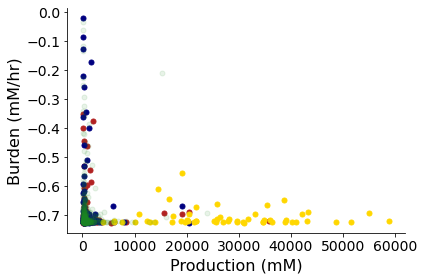

In [41]:
###FIGURE: Burden vs. production
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

ax.plot(sum_data_nc.ga_tot, -sum_data_nc.delta_burden, '.', c='firebrick', ms=10)
ax.plot(sum_data_dc.ga_tot, -sum_data_dc.delta_burden, '.', c='navy', ms=10)
ax.plot(sum_data_da.ga_tot, -sum_data_da.delta_burden, '.', c='gold', ms=10)
ax.plot(sum_data_ur.ga_tot, -sum_data_ur.delta_burden, '.', c='forestgreen', ms=10, alpha=0.1)
#ax.set_xlim([0, 3000])
fig.tight_layout()


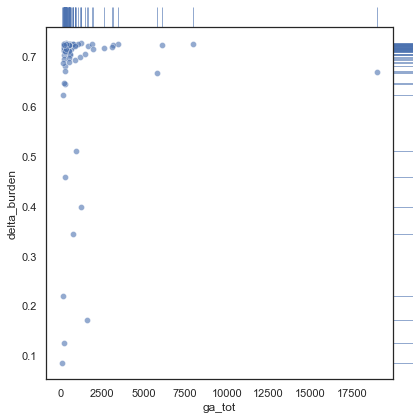

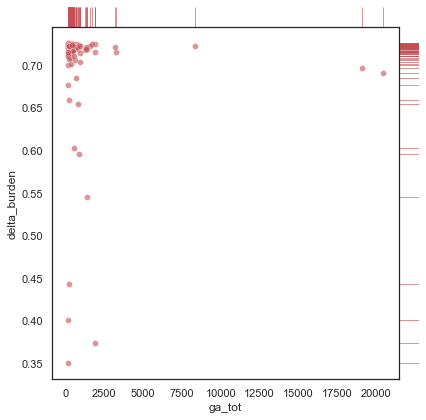

In [30]:
import seaborn as sns

g = sns.JointGrid(data=sum_data_dc, x="ga_tot", y="delta_burden", space=0, ratio=17)
g.plot_joint(sns.scatterplot,
             color="b", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="b", alpha=.6)

g = sns.JointGrid(data=sum_data_nc, x="ga_tot", y="delta_burden", space=0, ratio=17)
g.plot_joint(sns.scatterplot,
             color="r", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="r", alpha=.6)